In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import gymnasium as gym

# from bettermdptools.algorithms.planner import Planner
from planner import Planner
from plots import Plots

from bettermdptools.utils.test_env import TestEnv
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

from bettermdptools.utils.grid_search import GridSearch
from bettermdptools.utils.blackjack_wrapper import BlackjackWrapper
from bettermdptools.algorithms.rl import RL
import itertools

# reward shaping
from utils import update_reward

# Run the value_iteration

In [1]:
# Test graph
desc = ['SFFFHHHFFFFFFFFF',
 'FHHFFFFFFFHFHFFF',
 'FFHFHFFFFFFFFFFF',
 'FFFHFFFFFFFFFFHH',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFHFFFFFFFH',
 'FFFFHFFFFFFFFFFF',
 'FHFFFFFFHFFHFFFF',
 'HHFFHFFFHFFFHFFH',
 'HFHHFFFFFFFHFHFF',
 'FFHFFHFHHFHFFFFF',
 'FFFFFFFFFFFHFFFH',
 'FHFHFFFFFHFFFFFF',
 'FHHFFHFFFFFFFHFF',
 'FFFFFHFFHFFHHFFG']

In [93]:

# frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=MAP_SIZE, p=P_FROZEN), is_slippery=IS_SLIPPERY, render_mode="rgb_array")
frozen_lake = gym.make('FrozenLake-v1', desc=desc, is_slippery=IS_SLIPPERY, render_mode="human")

# frozen_lake = update_rewards(frozen_lake)

# reset the map first
s_0, info = frozen_lake.reset(seed=RANDOM_SEED)

# run VI
V, V_track, pi, n_i = Planner(frozen_lake.P).value_iteration(gamma=GAMMA, n_iters=N_ITERS, theta=THETA)

# V is the final value
# V_track is the value of each state at each iteration
# pi is the final policy - mapping states to actions

print(f"n_i : {n_i}")


runtime = 0.02 seconds
n_i : 31


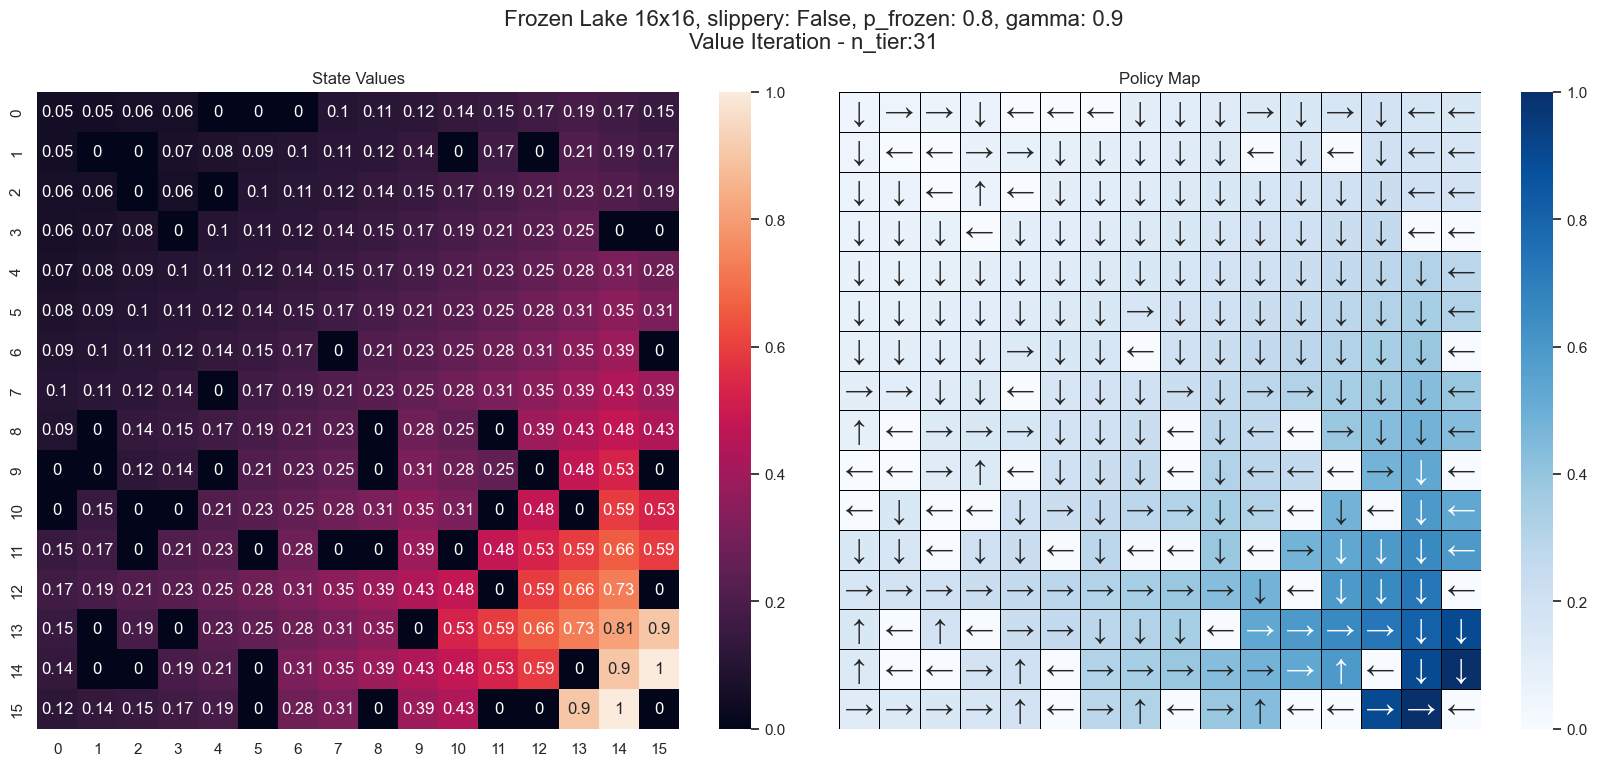

In [94]:
# plot state values
sns.set_theme(rc={'figure.figsize':(20.7,8.27)})

fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=0, hspace=0)

size=(MAP_SIZE, MAP_SIZE)

Plots.values_heat_map(V, "State Values", size, ax[0])

v_max, directions = Plots.get_policy_map(pi, V, {0: "←", 1: "↓", 2: "→", 3: "↑"}, size)

Plots.plot_policy(v_max, directions=directions, title='Policy Map', ax=ax[1])

fig.suptitle(f'Frozen Lake {MAP_SIZE}x{MAP_SIZE}, slippery: {IS_SLIPPERY}, p_frozen: {P_FROZEN}, gamma: {GAMMA}\nValue Iteration - n_tier:{n_i}', fontsize=16);


## Value Iter - Update the rewards

In [106]:

# frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=MAP_SIZE, p=P_FROZEN), is_slippery=IS_SLIPPERY, render_mode="rgb_array")
frozen_lake = gym.make('FrozenLake-v1', desc=desc, is_slippery=IS_SLIPPERY, render_mode="human")

frozen_lake = update_rewards(frozen_lake, prob_move=1,  move_cost=-0.1, stay_put_cost=0.0, goal_reward=10, hole_penalty=-10)

# reset the map first
s_0, info = frozen_lake.reset(seed=RANDOM_SEED)

# run VI
V, V_track, pi, n_i = Planner(frozen_lake.P).value_iteration(gamma=GAMMA, n_iters=N_ITERS, theta=THETA)

# V is the final value
# V_track is the value of each state at each iteration
# pi is the final policy - mapping states to actions

print(f"n_i : {n_i}")

runtime = 0.03 seconds
n_i : 26


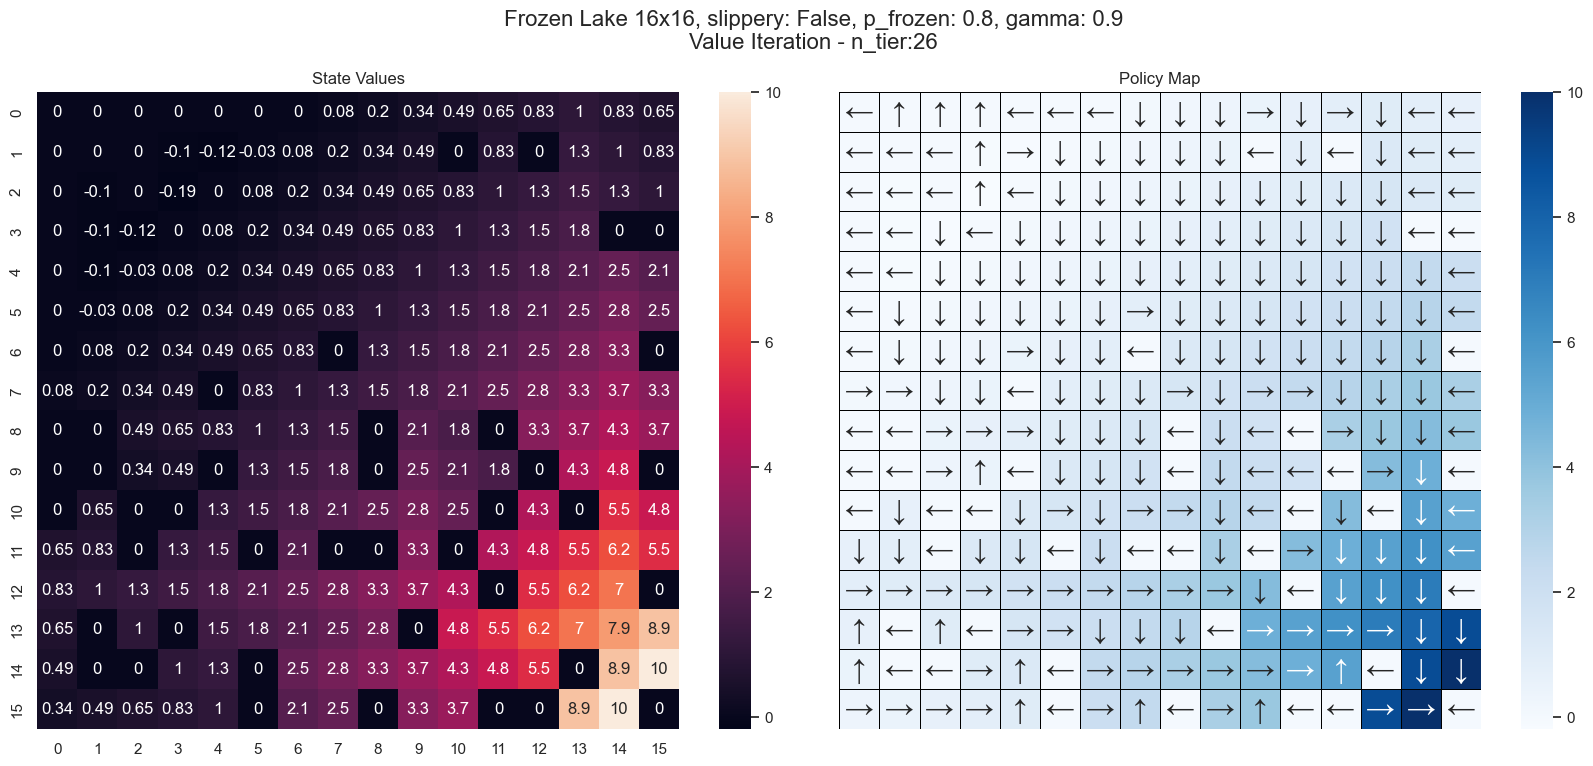

In [107]:
# plot state values
sns.set_theme(rc={'figure.figsize':(20.7,8.27)})

fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=0, hspace=0)

size=(MAP_SIZE, MAP_SIZE)

Plots.values_heat_map(V, "State Values", size, ax[0])

v_max, directions = Plots.get_policy_map(pi, V, {0: "←", 1: "↓", 2: "→", 3: "↑"}, size)

Plots.plot_policy(v_max, directions=directions, title='Policy Map', ax=ax[1])

fig.suptitle(f'Frozen Lake {MAP_SIZE}x{MAP_SIZE}, slippery: {IS_SLIPPERY}, p_frozen: {P_FROZEN}, gamma: {GAMMA}\nValue Iteration - n_tier:{n_i}', fontsize=16);



# Run policy_iteration

In [88]:
# frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=MAP_SIZE, p=P_FROZEN), is_slippery=IS_SLIPPERY, render_mode="rgb_array")
frozen_lake = gym.make('FrozenLake-v1', desc=desc, is_slippery=IS_SLIPPERY, render_mode="human")

# frozen_lake = update_rewards(frozen_lake, move_cost=-0.01, stay_put_cost=-0.0, goal_reward=10, hole_penalty=-10)

# reset the map first
s_0, info = frozen_lake.reset(seed=RANDOM_SEED)

# run VI
V, V_track, pi, n_i = Planner(frozen_lake.P).policy_iteration(gamma=GAMMA, n_iters=N_ITERS, theta=THETA)

# V is the final value
# V_track is the value of each state at each iteration
# pi is the final policy - mapping states to actions

print(f"n_i : {n_i}")

runtime = 0.03 seconds
n_i : 31


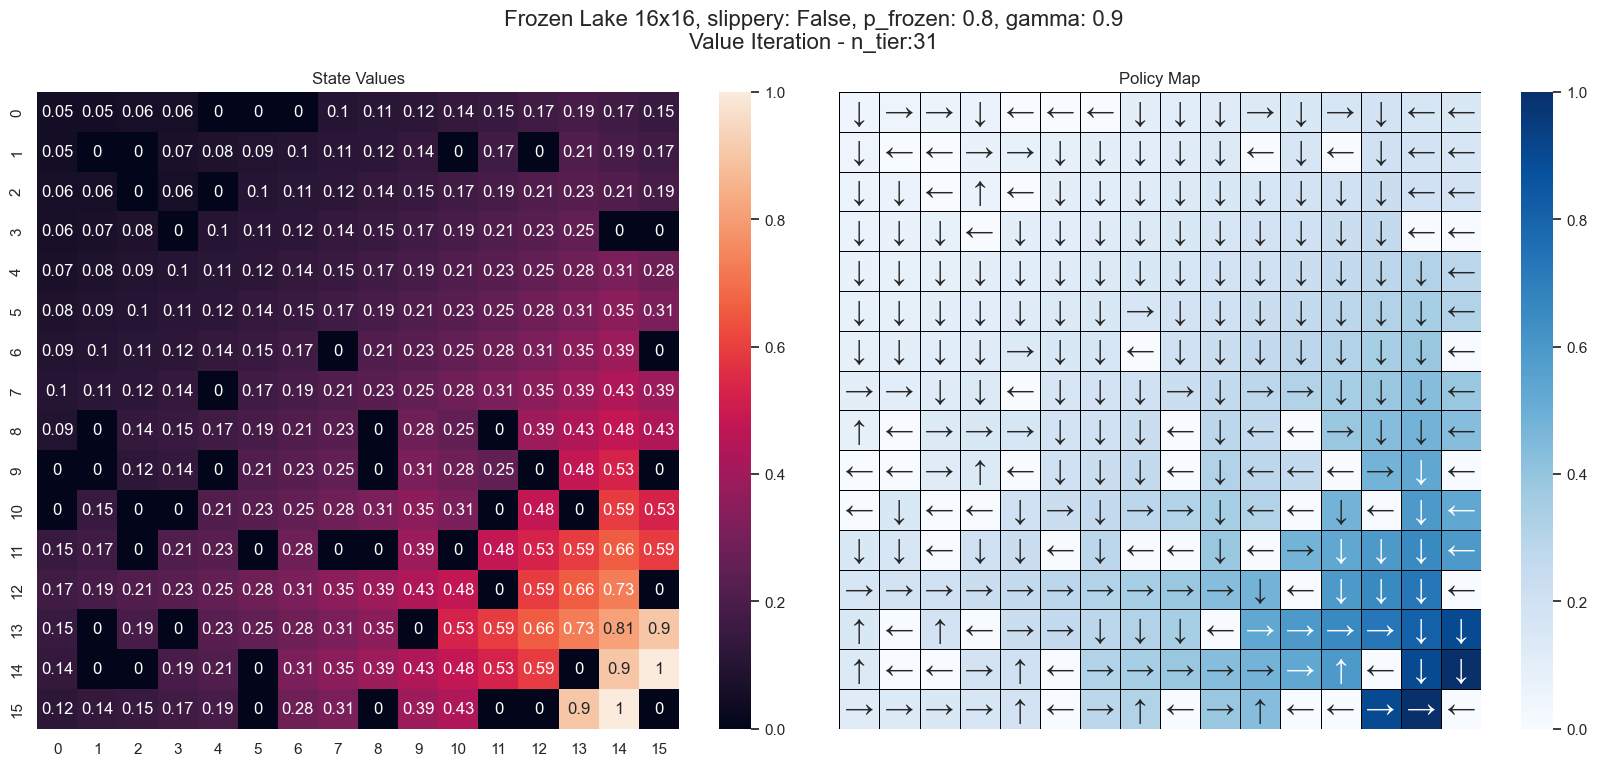

In [89]:
# plot state values
sns.set_theme(rc={'figure.figsize':(20.7,8.27)})

fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=0, hspace=0)

size=(MAP_SIZE, MAP_SIZE)

Plots.values_heat_map(V, "State Values", size, ax[0])

v_max, directions = Plots.get_policy_map(pi, V, {0: "←", 1: "↓", 2: "→", 3: "↑"}, size)

Plots.plot_policy(v_max, directions=directions, title='Policy Map', ax=ax[1])

fig.suptitle(f'Frozen Lake {MAP_SIZE}x{MAP_SIZE}, slippery: {IS_SLIPPERY}, p_frozen: {P_FROZEN}, gamma: {GAMMA}\Policy Iteration - n_tier:{n_i}', fontsize=16);



## Policy Iter - Update the rewards

In [ ]:
# frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=MAP_SIZE, p=P_FROZEN), is_slippery=IS_SLIPPERY, render_mode="rgb_array")
frozen_lake = gym.make('FrozenLake-v1', desc=desc, is_slippery=IS_SLIPPERY, render_mode="human")

# frozen_lake = update_rewards(frozen_lake, move_cost=-0.01, stay_put_cost=-0.0, goal_reward=10, hole_penalty=-10)

# reset the map first
s_0, info = frozen_lake.reset(seed=RANDOM_SEED)

# run VI
V, V_track, pi, n_i = Planner(frozen_lake.P).policy_iteration(gamma=GAMMA, n_iters=N_ITERS, theta=THETA)

# V is the final value
# V_track is the value of each state at each iteration
# pi is the final policy - mapping states to actions

print(f"n_i : {n_i}")

In [ ]:
# plot state values
sns.set_theme(rc={'figure.figsize':(20.7,8.27)})

fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=0, hspace=0)

size=(MAP_SIZE, MAP_SIZE)

Plots.values_heat_map(V, "State Values", size, ax[0])

v_max, directions = Plots.get_policy_map(pi, V, {0: "←", 1: "↓", 2: "→", 3: "↑"}, size)

Plots.plot_policy(v_max, directions=directions, title='Policy Map', ax=ax[1])

fig.suptitle(f'Frozen Lake {MAP_SIZE}x{MAP_SIZE}, slippery: {IS_SLIPPERY}, p_frozen: {P_FROZEN}, gamma: {GAMMA}\Policy Iteration - n_tier:{n_i}', fontsize=16);



# Value Iteration - Grid

In [30]:
map_sizes = np.arange(4, 30, 2)
p_frozen_values = [0.6, 0.7, 0.8, 0.9, 1]
gamma_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_iters_values = [1000]
theta_values = [1e-10, 1e-3]
is_slippery = False

grid_res = []

for grid_params in itertools.product(map_sizes, p_frozen_values, gamma_values, n_iters_values, theta_values):

    map_size, p_frozen, gamma, n_iters, theta = grid_params

    print(f"Running PI with map_size: {map_size}, p_frozen: {p_frozen}, gamma: {gamma},  n_iters:{n_iters}, theta:{theta}")
    
    env = gym.make('FrozenLake-v1', desc=generate_random_map(size=map_size, p=p_frozen), is_slippery=is_slippery)
    env.reset(seed=RANDOM_SEED)

    V, V_track, pi, n_i = Planner(env.P).value_iteration(gamma=gamma, n_iters=n_iters, theta=theta)

    episode_rewards = TestEnv.test_env(env=env, n_iters=2, pi=pi)

    mean_reward = np.mean(episode_rewards)
    stdev_reward = np.std(episode_rewards)

    grid_res.append({'map_size': map_size, 'p_frozen': p_frozen, 'gamma': gamma, 'n_iters': n_iters, 'theta': theta, 'n_i': n_i, 'mean_reward': mean_reward, 'stdev_reward': stdev_reward})

    

(4, 0.6, 0.1, 1000, 1e-10)
Running PI with map_size: 4, p_frozen: 0.6, gamma: 0.1,  n_iters:1000, theta:1e-10
runtime = 0.00 seconds
(4, 0.6, 0.1, 1000, 0.001)
Running PI with map_size: 4, p_frozen: 0.6, gamma: 0.1,  n_iters:1000, theta:0.001
runtime = 0.00 seconds
(4, 0.6, 0.2, 1000, 1e-10)
Running PI with map_size: 4, p_frozen: 0.6, gamma: 0.2,  n_iters:1000, theta:1e-10
runtime = 0.00 seconds
(4, 0.6, 0.2, 1000, 0.001)
Running PI with map_size: 4, p_frozen: 0.6, gamma: 0.2,  n_iters:1000, theta:0.001
runtime = 0.00 seconds
(4, 0.6, 0.3, 1000, 1e-10)
Running PI with map_size: 4, p_frozen: 0.6, gamma: 0.3,  n_iters:1000, theta:1e-10
runtime = 0.00 seconds
(4, 0.6, 0.3, 1000, 0.001)
Running PI with map_size: 4, p_frozen: 0.6, gamma: 0.3,  n_iters:1000, theta:0.001
runtime = 0.00 seconds
(4, 0.6, 0.4, 1000, 1e-10)
Running PI with map_size: 4, p_frozen: 0.6, gamma: 0.4,  n_iters:1000, theta:1e-10
runtime = 0.00 seconds
(4, 0.6, 0.4, 1000, 0.001)
Running PI with map_size: 4, p_frozen: 0.6

c:\Users\pavan\anaconda3\envs\ml\Lib\site-packages\gymnasium\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


runtime = 0.00 seconds
(6, 0.8, 0.9, 1000, 0.001)
Running PI with map_size: 6, p_frozen: 0.8, gamma: 0.9,  n_iters:1000, theta:0.001
runtime = 0.00 seconds
(6, 0.8, 1, 1000, 1e-10)
Running PI with map_size: 6, p_frozen: 0.8, gamma: 1,  n_iters:1000, theta:1e-10
runtime = 0.00 seconds
(6, 0.8, 1, 1000, 0.001)
Running PI with map_size: 6, p_frozen: 0.8, gamma: 1,  n_iters:1000, theta:0.001
runtime = 0.00 seconds
(6, 0.9, 0.1, 1000, 1e-10)
Running PI with map_size: 6, p_frozen: 0.9, gamma: 0.1,  n_iters:1000, theta:1e-10
runtime = 0.00 seconds
(6, 0.9, 0.1, 1000, 0.001)
Running PI with map_size: 6, p_frozen: 0.9, gamma: 0.1,  n_iters:1000, theta:0.001
runtime = 0.00 seconds
(6, 0.9, 0.2, 1000, 1e-10)
Running PI with map_size: 6, p_frozen: 0.9, gamma: 0.2,  n_iters:1000, theta:1e-10
runtime = 0.00 seconds
(6, 0.9, 0.2, 1000, 0.001)
Running PI with map_size: 6, p_frozen: 0.9, gamma: 0.2,  n_iters:1000, theta:0.001
runtime = 0.00 seconds
(6, 0.9, 0.3, 1000, 1e-10)
Running PI with map_size: 6

In [31]:
grid_params_df = pd.DataFrame(grid_res)

In [32]:
grid_params_df.to_csv('./data/fl_grid_vi_determ_df.csv', index=False)

<Axes: xlabel='map_size', ylabel='n_i'>

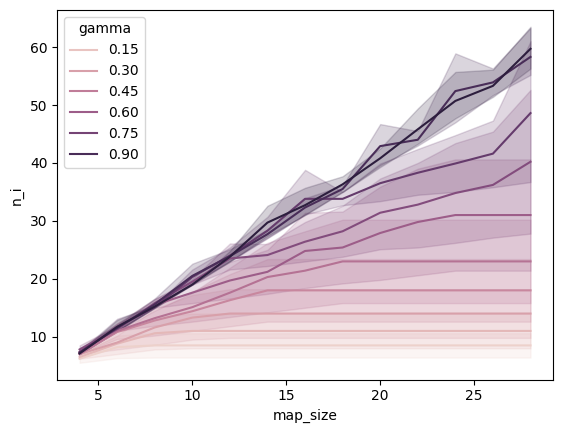

In [33]:

# grid_params_df.plot(x='map_size', y='n_i', kind='line', hue='gamma', colormap='viridis', title='Mean Reward vs n_i')
sns.lineplot(data=grid_params_df, x='map_size', y='n_i', hue='gamma')

<Axes: xlabel='gamma', ylabel='mean_reward'>

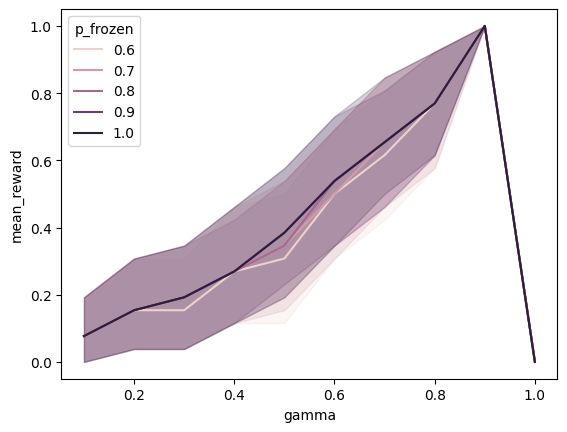

In [34]:
# grid_params_df.plot(x='map_size', y='n_i', kind='line', hue='gamma', colormap='viridis', title='Mean Reward vs n_i')
sns.lineplot(data=grid_params_df, x='gamma', y='mean_reward', hue='p_frozen')

<Axes: xlabel='gamma', ylabel='mean_reward'>

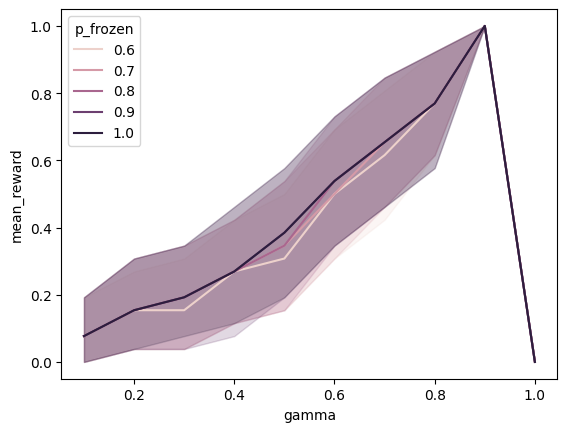

In [35]:

# grid_params_df.plot(x='map_size', y='n_i', kind='line', hue='gamma', colormap='viridis', title='Mean Reward vs n_i')
sns.lineplot(data=grid_params_df, x='gamma', y='mean_reward', hue='p_frozen')

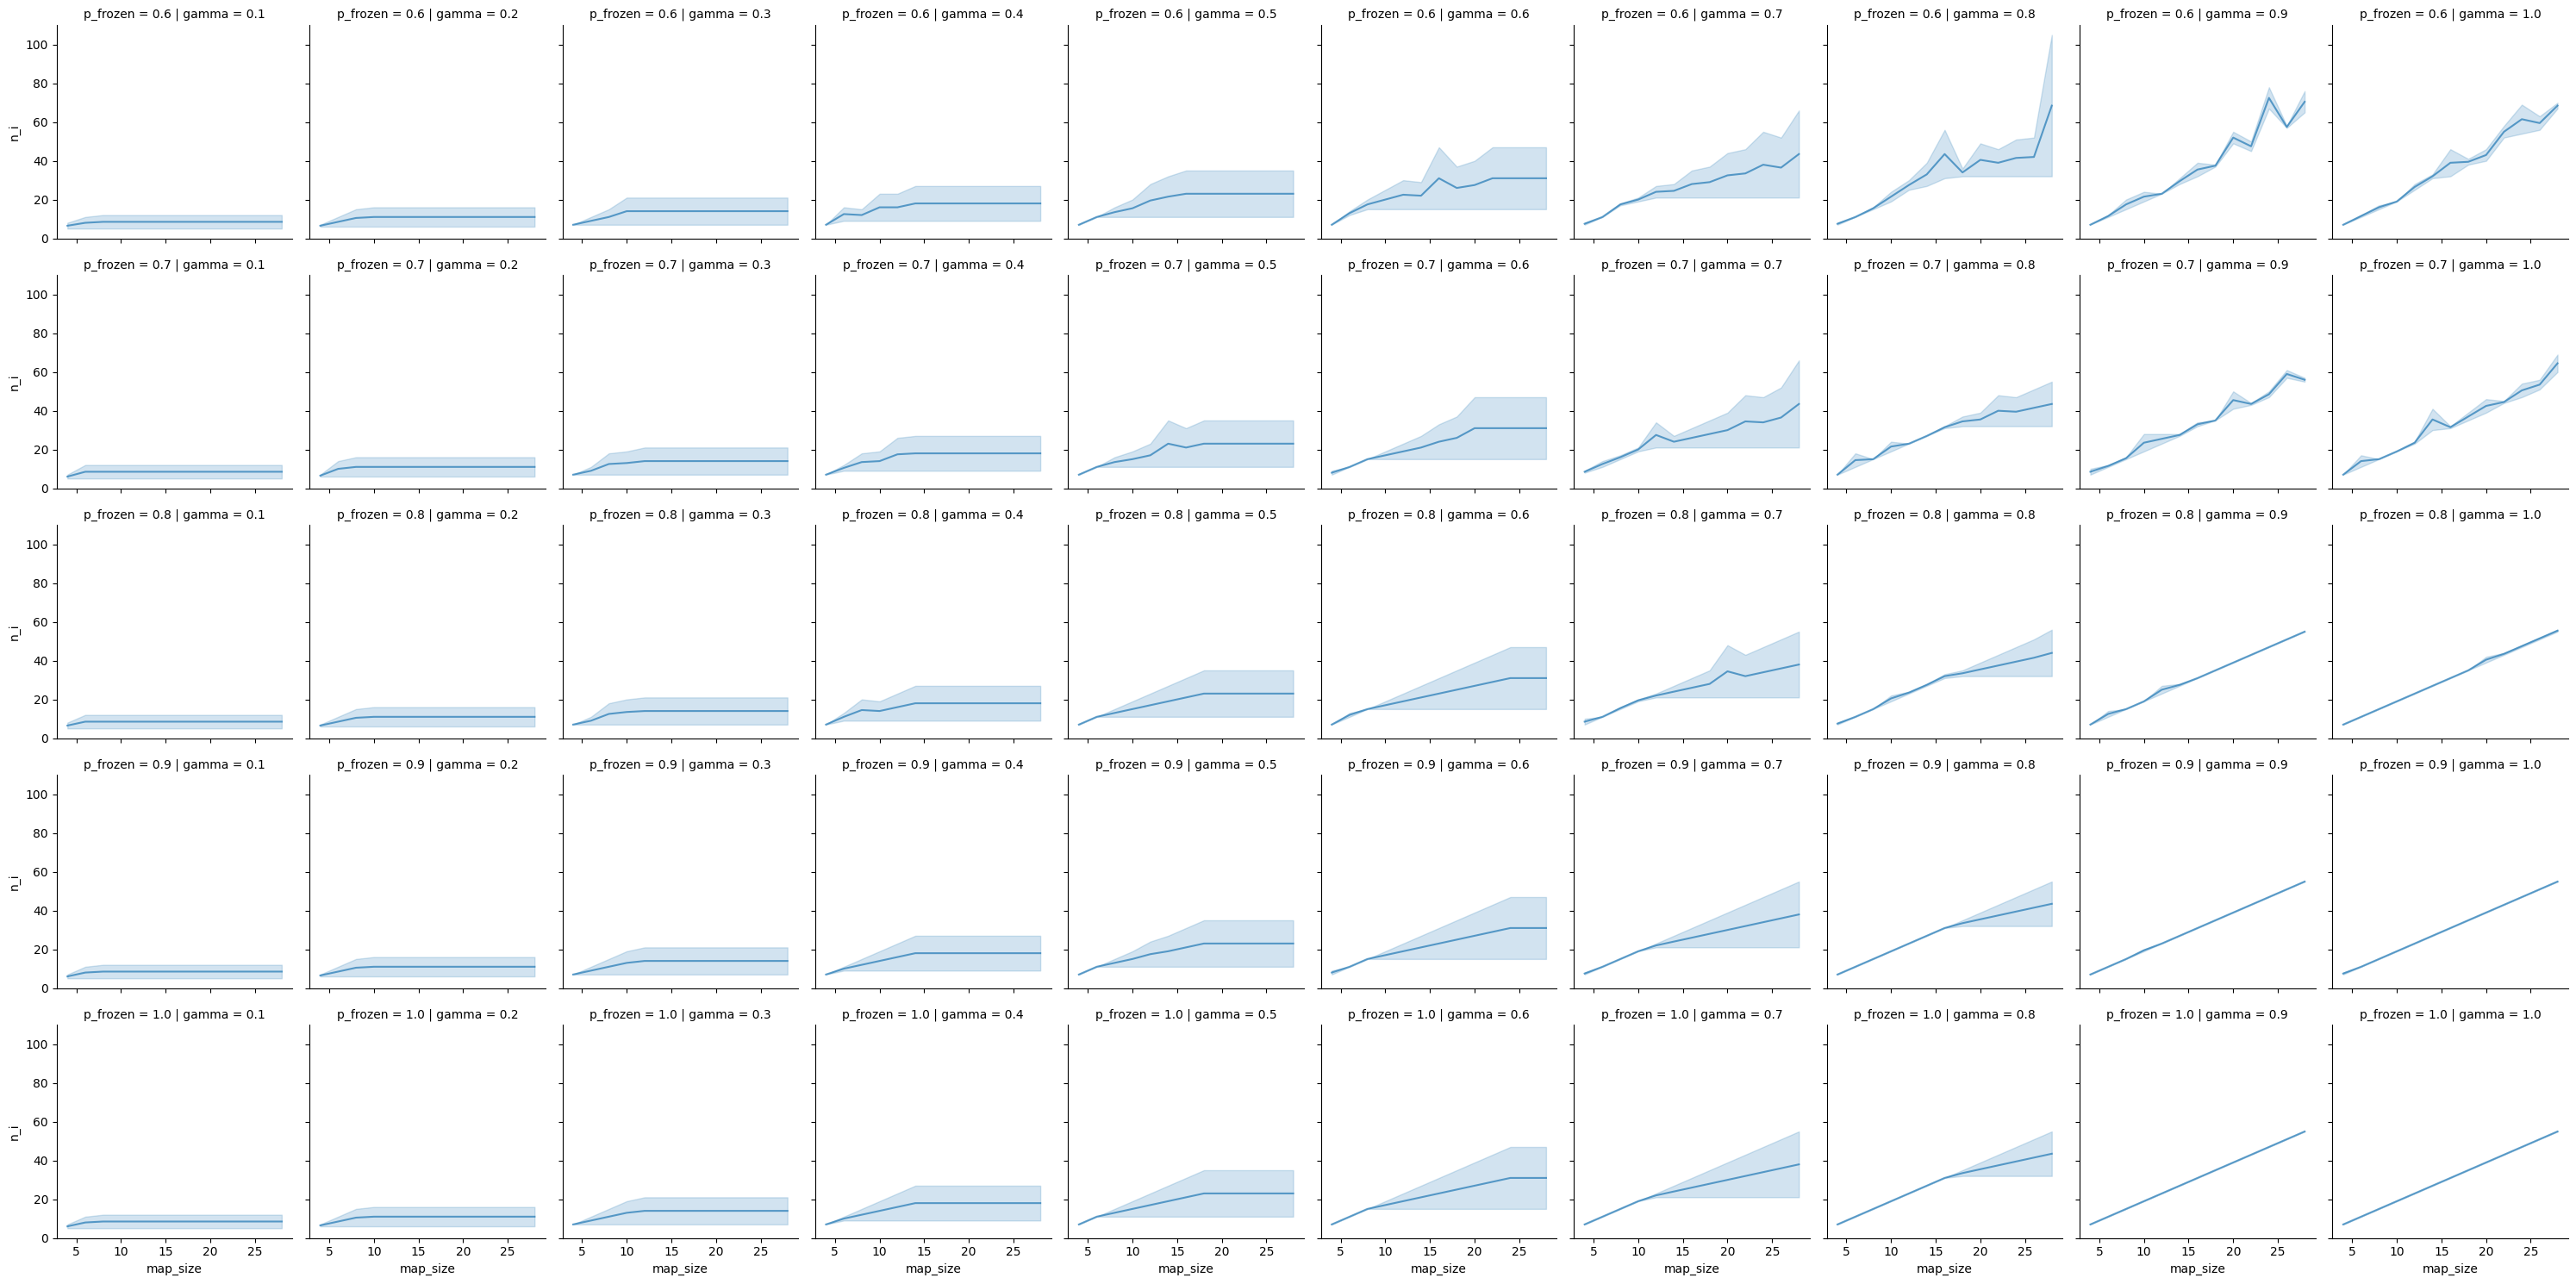

In [36]:
g = sns.FacetGrid(grid_params_df, col="gamma", row="p_frozen")
g.map(sns.lineplot, "map_size", "n_i", alpha=.7);


# Run policy_iteration

# Policy iteration - Grid

In [17]:
map_sizes = np.arange(4, 30, 2)
p_frozen_values = [0.6, 0.7, 0.8, 0.9, 1]
gamma_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_iters_values = [1000]
theta_values = [1e-10, 1e-3]
is_slippery = False
RANDOM_SEED = 42

grid_res = []

for grid_params in itertools.product(map_sizes, p_frozen_values, gamma_values, n_iters_values, theta_values):

    map_size, p_frozen, gamma, n_iters, theta = grid_params

    print(f"Running PI with map_size: {map_size}, p_frozen: {p_frozen}, gamma: {gamma},  n_iters:{n_iters}, theta:{theta}")
    
    env = gym.make('FrozenLake-v1', desc=generate_random_map(size=map_size, p=p_frozen), is_slippery=is_slippery)
    env.reset(seed=RANDOM_SEED)

    V, V_track, pi, n_i = Planner(env.P).policy_iteration(gamma=gamma, n_iters=n_iters, theta=theta)

    episode_rewards = TestEnv.test_env(env=env, n_iters=2, pi=pi)

    mean_reward = np.mean(episode_rewards)
    stdev_reward = np.std(episode_rewards)

    grid_res.append({'map_size': map_size, 'p_frozen': p_frozen, 'gamma': gamma, 'n_iters': n_iters, 'theta': theta, 'n_i': n_i, 'mean_reward': mean_reward, 'stdev_reward': stdev_reward})

    

(4, 0.6, 0.1, 1000, 1e-10)
Running PI with map_size: 4, p_frozen: 0.6, gamma: 0.1,  n_iters:1000, theta:1e-10
runtime = 0.00 seconds
(4, 0.6, 0.1, 1000, 0.001)
Running PI with map_size: 4, p_frozen: 0.6, gamma: 0.1,  n_iters:1000, theta:0.001
runtime = 0.00 seconds
(4, 0.6, 0.2, 1000, 1e-10)
Running PI with map_size: 4, p_frozen: 0.6, gamma: 0.2,  n_iters:1000, theta:1e-10
runtime = 0.00 seconds
(4, 0.6, 0.2, 1000, 0.001)
Running PI with map_size: 4, p_frozen: 0.6, gamma: 0.2,  n_iters:1000, theta:0.001
runtime = 0.00 seconds
(4, 0.6, 0.3, 1000, 1e-10)
Running PI with map_size: 4, p_frozen: 0.6, gamma: 0.3,  n_iters:1000, theta:1e-10
runtime = 0.00 seconds
(4, 0.6, 0.3, 1000, 0.001)
Running PI with map_size: 4, p_frozen: 0.6, gamma: 0.3,  n_iters:1000, theta:0.001
runtime = 0.00 seconds
(4, 0.6, 0.4, 1000, 1e-10)
Running PI with map_size: 4, p_frozen: 0.6, gamma: 0.4,  n_iters:1000, theta:1e-10
runtime = 0.00 seconds
(4, 0.6, 0.4, 1000, 0.001)
Running PI with map_size: 4, p_frozen: 0.6

c:\Users\pavan\anaconda3\envs\ml\Lib\site-packages\gymnasium\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


runtime = 0.00 seconds
(6, 0.8, 0.2, 1000, 1e-10)
Running PI with map_size: 6, p_frozen: 0.8, gamma: 0.2,  n_iters:1000, theta:1e-10
runtime = 0.00 seconds
(6, 0.8, 0.2, 1000, 0.001)
Running PI with map_size: 6, p_frozen: 0.8, gamma: 0.2,  n_iters:1000, theta:0.001
runtime = 0.00 seconds
(6, 0.8, 0.3, 1000, 1e-10)
Running PI with map_size: 6, p_frozen: 0.8, gamma: 0.3,  n_iters:1000, theta:1e-10
runtime = 0.00 seconds
(6, 0.8, 0.3, 1000, 0.001)
Running PI with map_size: 6, p_frozen: 0.8, gamma: 0.3,  n_iters:1000, theta:0.001
runtime = 0.00 seconds
(6, 0.8, 0.4, 1000, 1e-10)
Running PI with map_size: 6, p_frozen: 0.8, gamma: 0.4,  n_iters:1000, theta:1e-10
runtime = 0.00 seconds
(6, 0.8, 0.4, 1000, 0.001)
Running PI with map_size: 6, p_frozen: 0.8, gamma: 0.4,  n_iters:1000, theta:0.001
runtime = 0.00 seconds
(6, 0.8, 0.5, 1000, 1e-10)
Running PI with map_size: 6, p_frozen: 0.8, gamma: 0.5,  n_iters:1000, theta:1e-10
runtime = 0.00 seconds
(6, 0.8, 0.5, 1000, 0.001)
Running PI with map

In [18]:
grid_params_df = pd.DataFrame(grid_res)

In [20]:
grid_params_df.to_csv('./data/fl_grid_pi_determ_df.csv', index=False)

<Axes: xlabel='map_size', ylabel='n_i'>

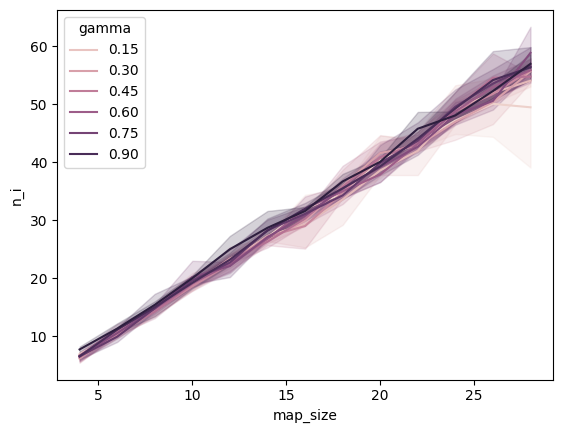

In [21]:

# grid_params_df.plot(x='map_size', y='n_i', kind='line', hue='gamma', colormap='viridis', title='Mean Reward vs n_i')
sns.lineplot(data=grid_params_df, x='map_size', y='n_i', hue='gamma')

<Axes: xlabel='gamma', ylabel='mean_reward'>

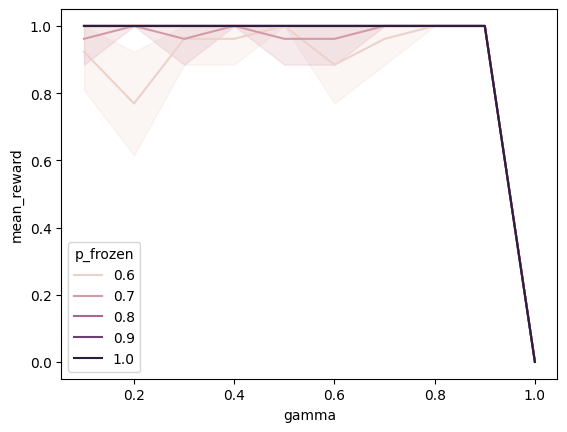

In [28]:

# grid_params_df.plot(x='map_size', y='n_i', kind='line', hue='gamma', colormap='viridis', title='Mean Reward vs n_i')
sns.lineplot(data=grid_params_df, x='gamma', y='mean_reward', hue='p_frozen')

<Axes: xlabel='map_size', ylabel='n_i'>

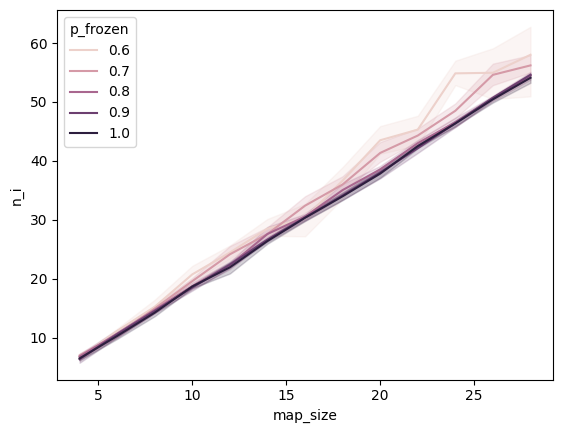

In [22]:
# grid_params_df.plot(x='map_size', y='n_i', kind='line', hue='gamma', colormap='viridis', title='Mean Reward vs n_i')
sns.lineplot(data=grid_params_df, x='map_size', y='n_i', hue='p_frozen')

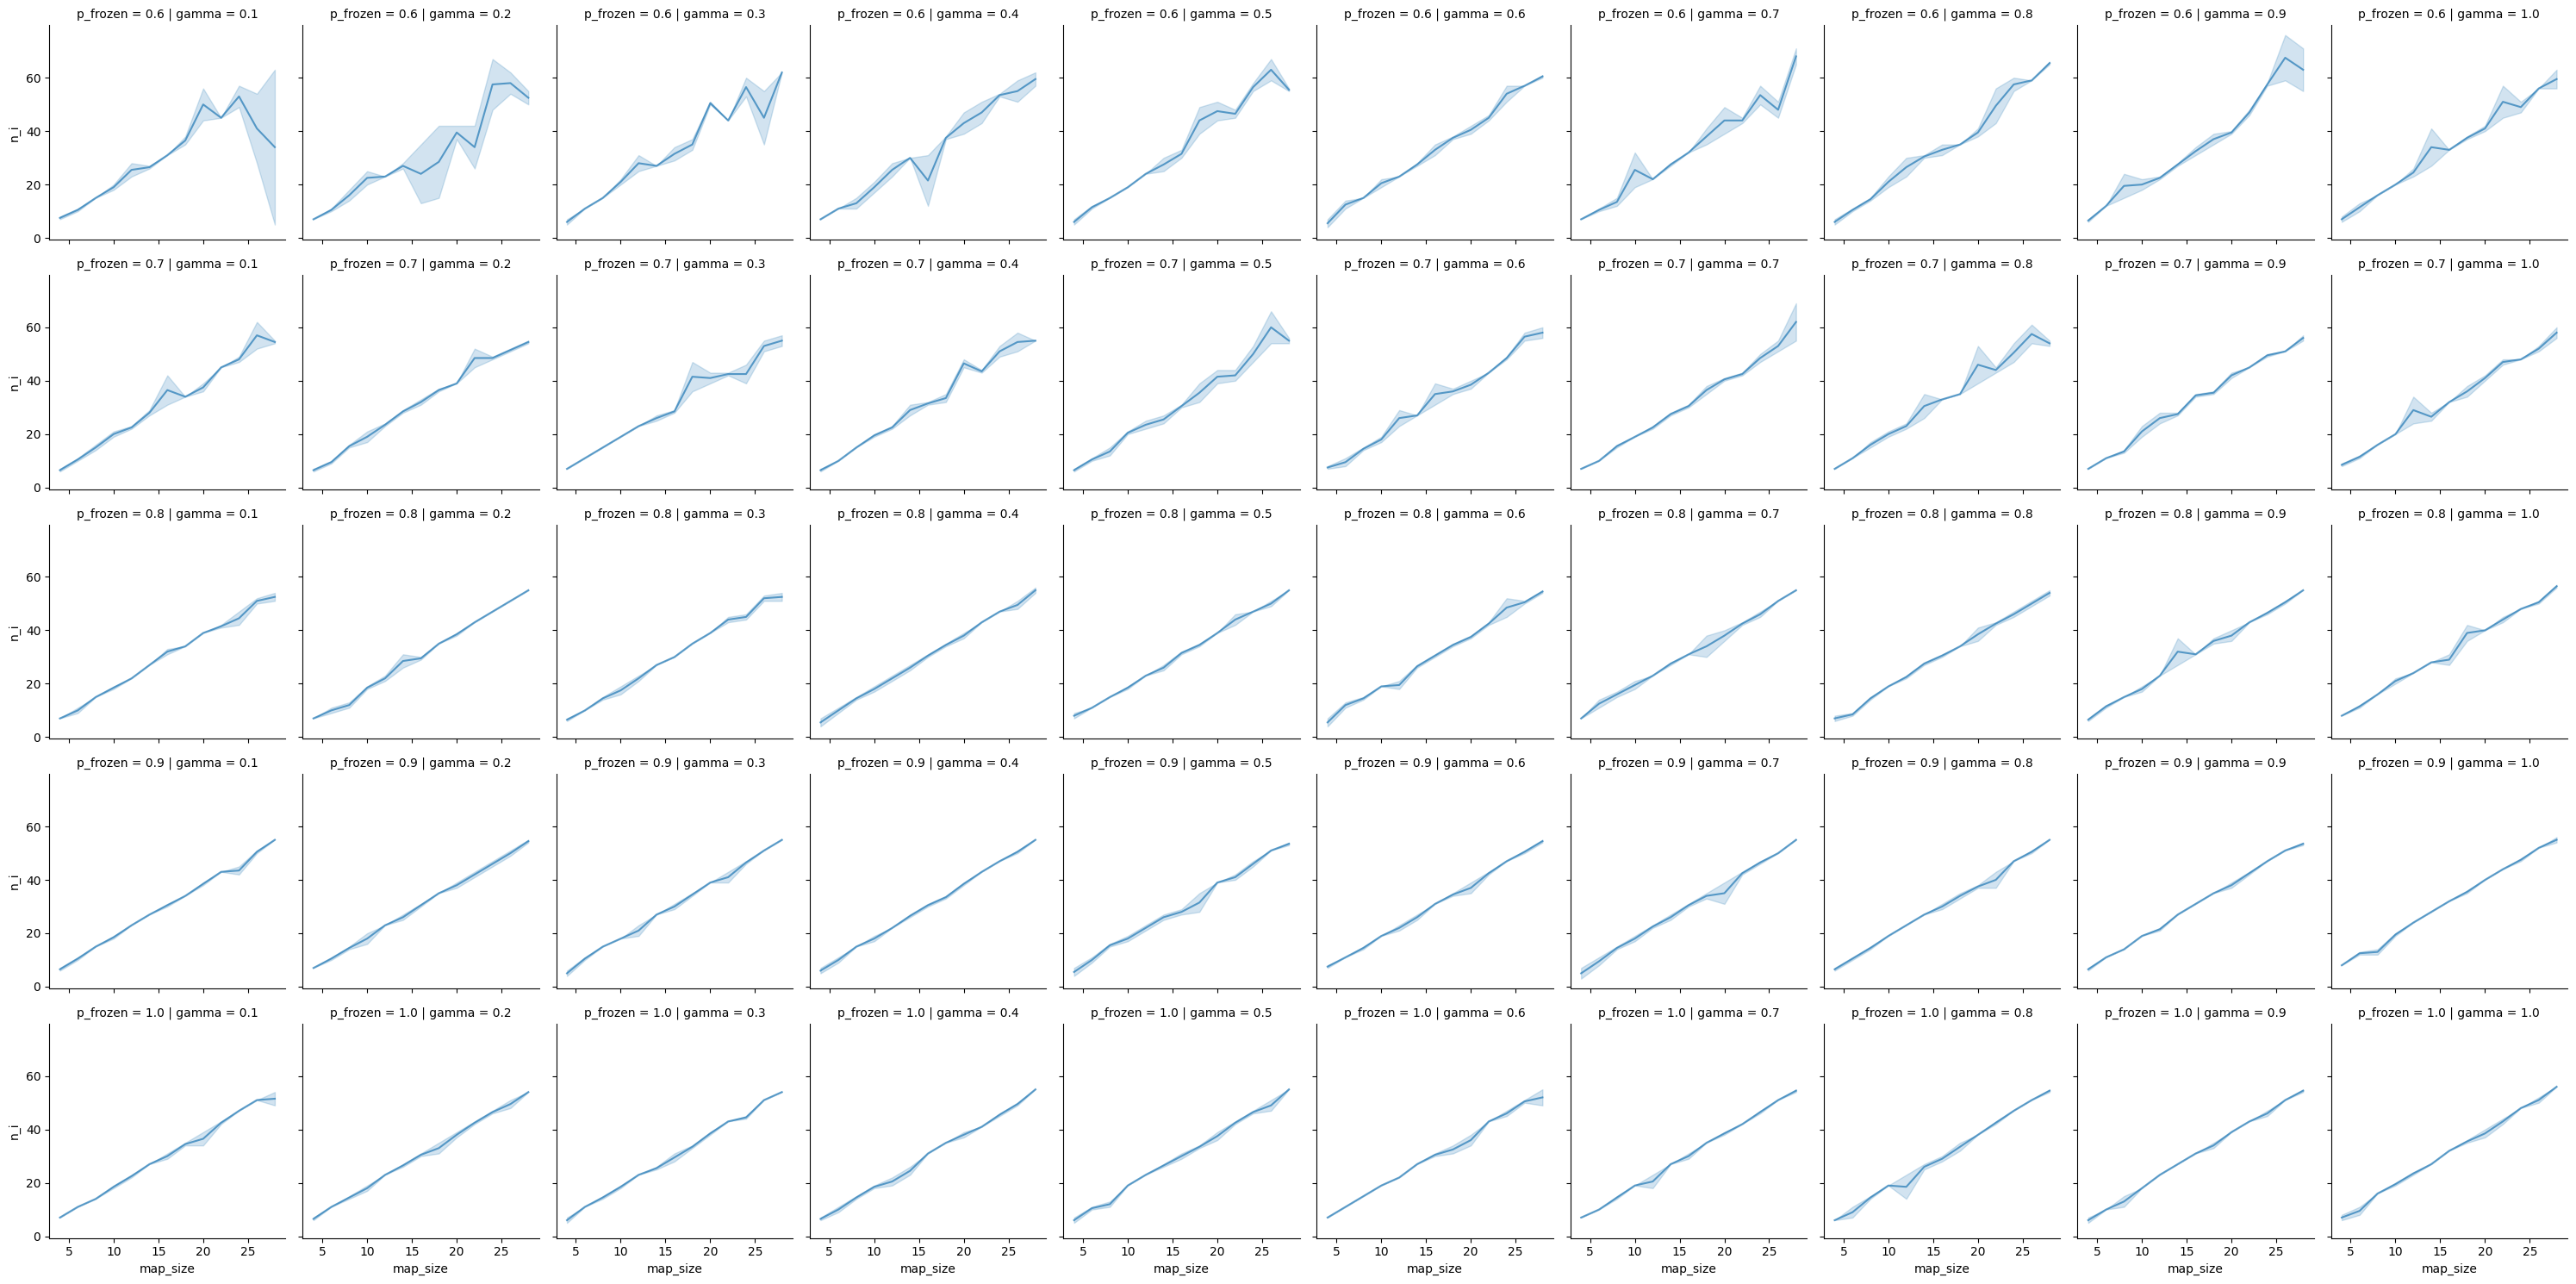

In [23]:
g = sns.FacetGrid(grid_params_df, col="gamma", row="p_frozen")
g.map(sns.lineplot, "map_size", "n_i", alpha=.7);


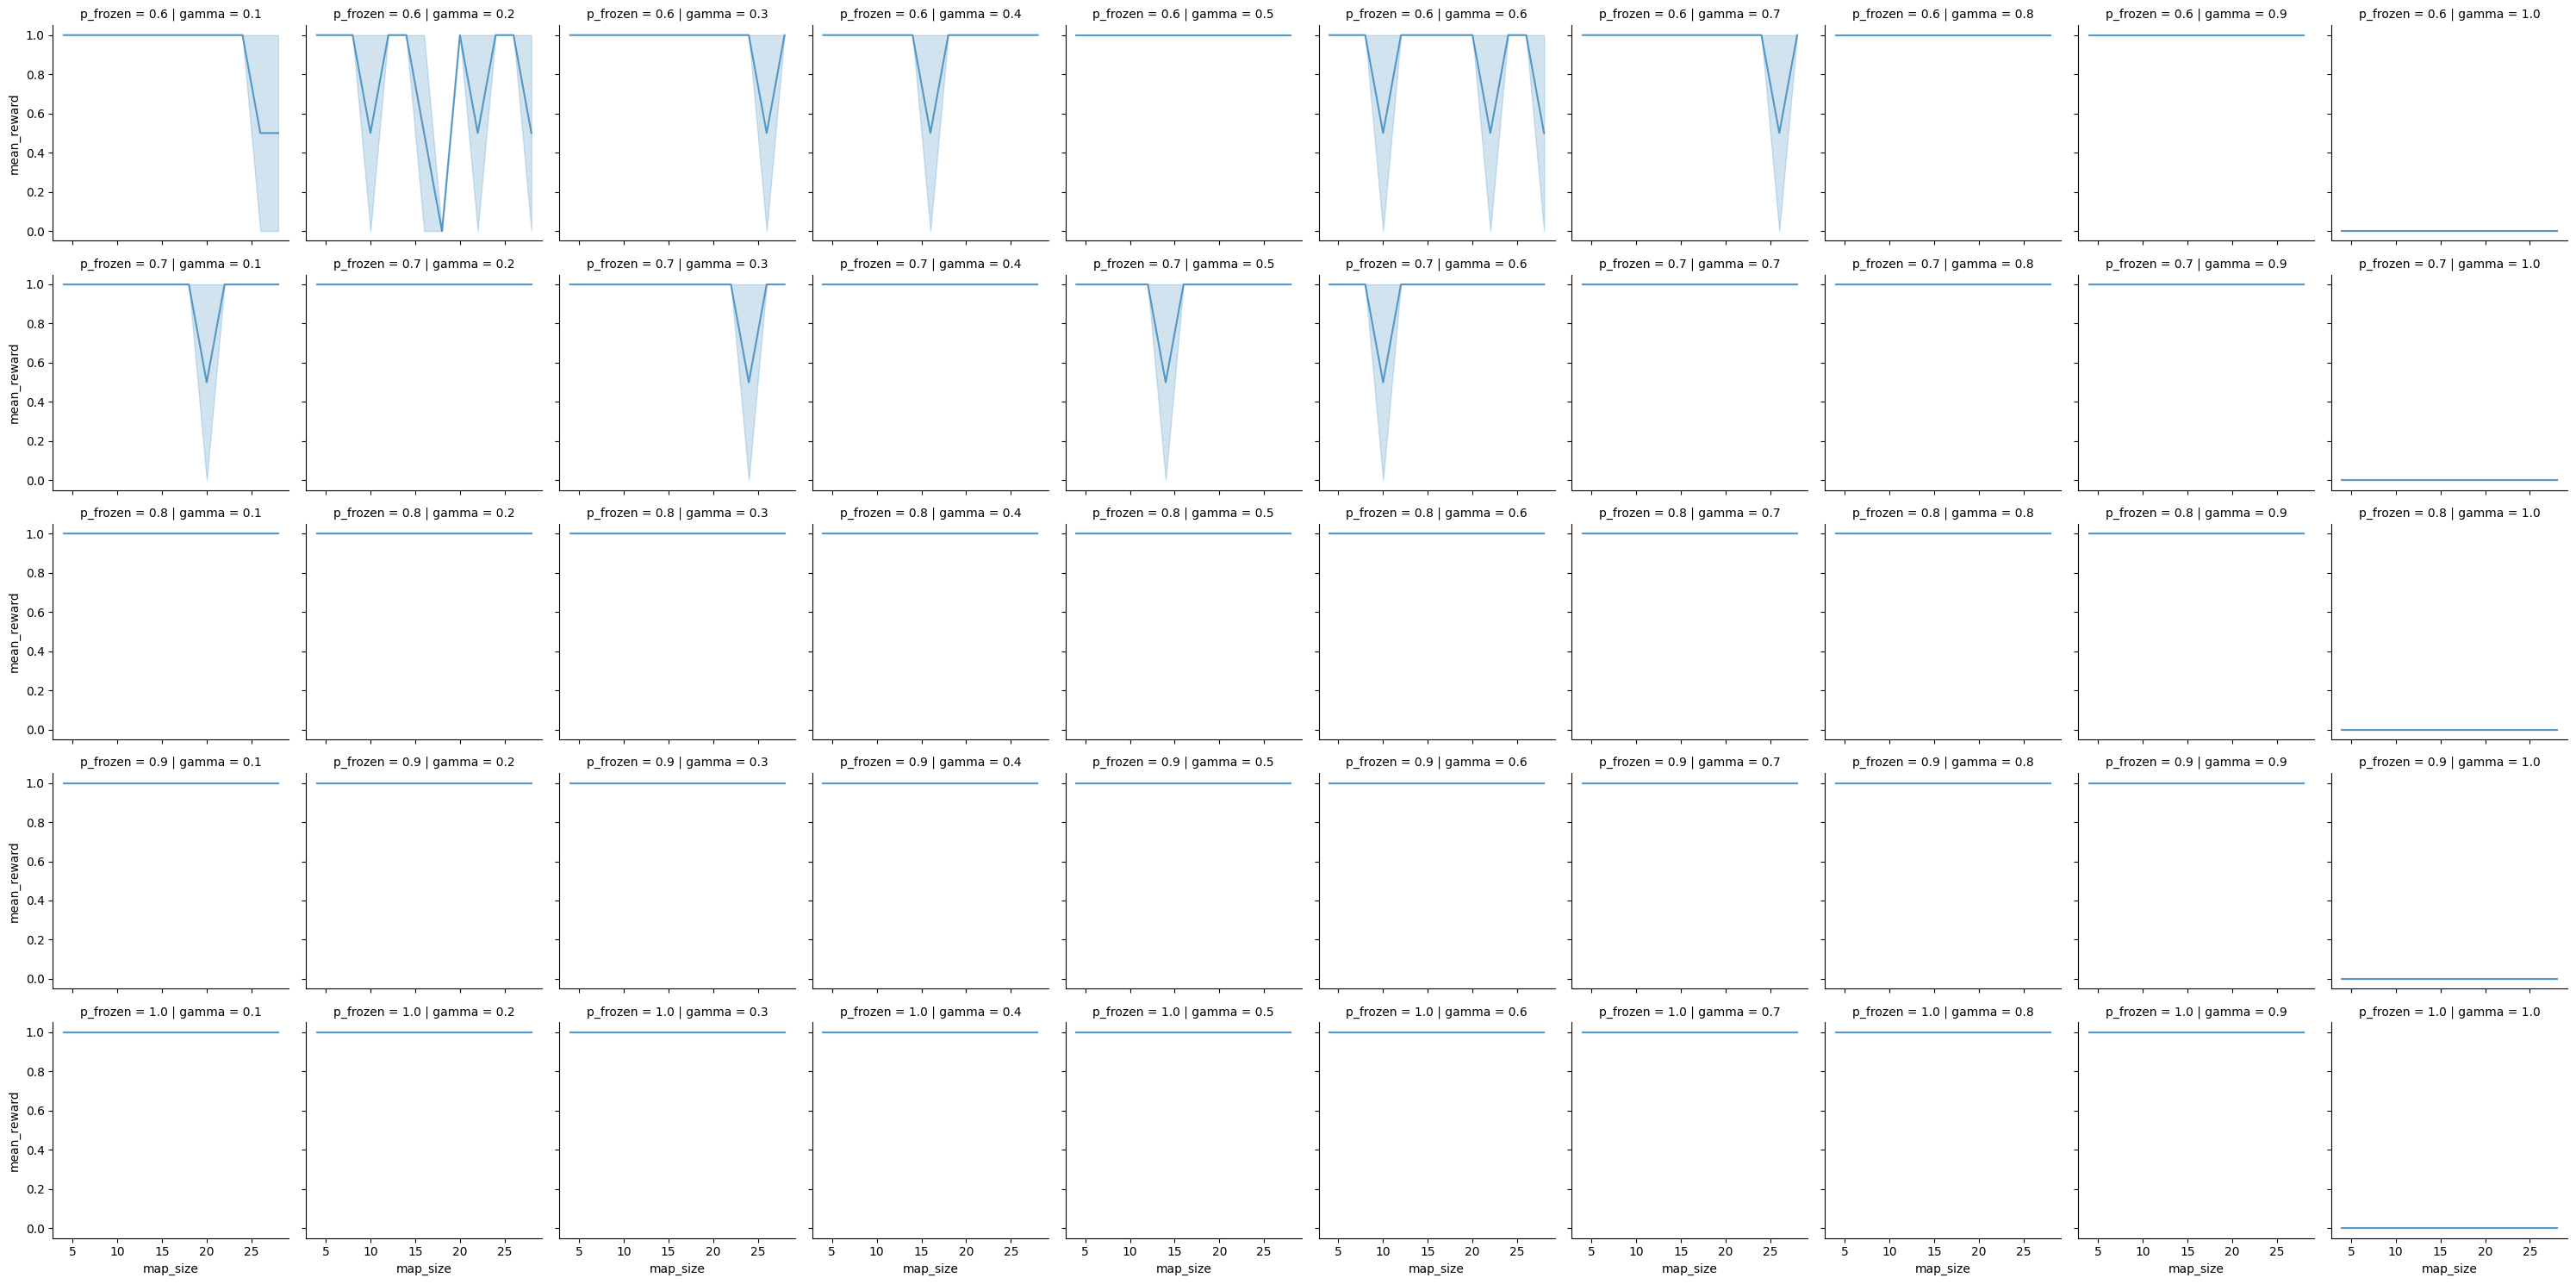

In [24]:
g = sns.FacetGrid(grid_params_df, col="gamma", row="p_frozen")
g.map(sns.lineplot, "map_size", "mean_reward", alpha=.7);


<Axes: xlabel='gamma', ylabel='mean_reward'>

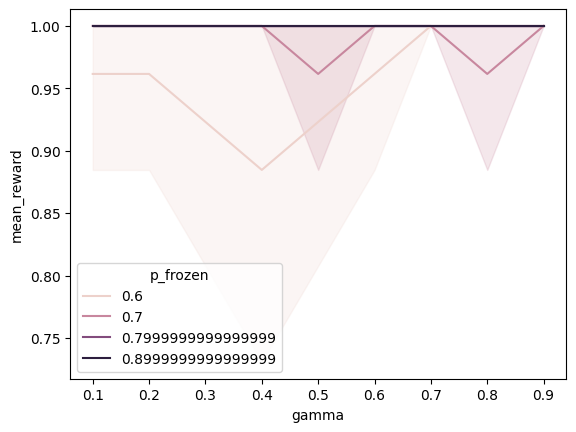

In [13]:
sns.lineplot(data=grid_params_df, x='gamma', y='mean_reward', hue='p_frozen')

In [38]:
grid_params_df

,map_size,p_frozen,gamma,n_iters,theta,n_i,mean_reward,stdev_reward
0,16,0.8,0.90,1000,1.000000e-10,31,1.0,0.0
1,16,0.8,0.90,1000,1.000000e-03,27,1.0,0.0
2,16,0.8,0.95,1000,1.000000e-10,30,1.0,0.0
3,16,0.8,0.95,1000,1.000000e-03,30,1.0,0.0
4,16,0.9,0.90,1000,1.000000e-10,31,1.0,0.0
5,16,0.9,0.90,1000,1.000000e-03,31,1.0,0.0
6,16,0.9,0.95,1000,1.000000e-10,27,1.0,0.0
7,16,0.9,0.95,1000,1.000000e-03,31,1.0,0.0
8,20,0.8,0.90,1000,1.000000e-10,39,1.0,0.0
9,20,0.8,0.90,1000,1.000000e-03,41,1.0,0.0


In [ ]:
env.reset(seed=RANDOM_SEED)

V, V_track, pi = Planner(env.P).policy_iteration(gamma=gamma, n_iters=n_iters, theta=theta)

In [ ]:
V_track.mean(axis=1)

In [ ]:
V_track[24, :]